## Analysis

In [1]:
import scanpy as sc
import scvi
import seaborn as sns
import numpy as np
import pandas as pd

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read_h5ad('integrated.h5ad')

In [3]:
adata.obs.Sample.unique().tolist()

['C51ctr',
 'C52ctr',
 'C53ctr',
 'C54ctr',
 'C55ctr',
 'C56ctr',
 'C57ctr',
 'L01cov',
 'L03cov',
 'L04cov',
 'L04covaddon',
 'L05cov',
 'L06cov',
 'L07cov',
 'L08cov',
 'L09cov',
 'L10cov',
 'L11cov',
 'L12cov',
 'L13cov',
 'L15cov',
 'L16cov',
 'L17cov',
 'L18cov',
 'L19cov',
 'L21cov',
 'L22cov']

In [4]:
def map_condition(x):
    if 'cov' in x:
        return 'COVID19'
    else:
        return 'control'

In [5]:
adata.obs['condition'] = adata.obs.Sample.map(map_condition)

In [6]:
adata.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
CGTTCTGGTACTAGCT-1_1,C51ctr,False,2434,2434,6047.0,0.0,0.0,1.0,0.016537,0,0,4,1.656726,AT2,control
CTGGCAGGTTCGGTAT-1_1,C51ctr,False,2444,2444,5899.0,0.0,0.0,5.0,0.084760,0,0,4,1.699524,AT2,control
ACACCAACACAACGCC-1_1,C51ctr,False,2451,2451,5497.0,0.0,0.0,3.0,0.054575,0,0,3,1.821494,AT1,control
CCTCAACCATACAGGG-1_1,C51ctr,False,2276,2276,5434.0,0.0,0.0,0.0,0.000000,0,0,8,1.842978,Dendritic,control
ACAAAGATCCACAGGC-1_1,C51ctr,False,2310,2310,5504.0,0.0,0.0,1.0,0.018169,0,0,4,1.819174,AT2,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,16,24.213076,AT2,COVID19
CGTGAATCATGTCTAG-1_27,L22cov,False,350,350,402.0,0.0,0.0,0.0,0.000000,0,0,0,24.937656,Monocytes,COVID19
GCCGATGAGTAAACGT-1_27,L22cov,False,326,326,401.0,0.0,0.0,8.0,1.995013,0,0,4,24.937656,AT2,COVID19
AGGGTGAGTATCAGGG-1_27,L22cov,False,331,331,402.0,0.0,0.0,0.0,0.000000,0,0,11,24.937656,Basal,COVID19


In [7]:
num_tot_cells = adata.obs.groupby(['Sample']).count()
num_tot_cells = dict(zip(num_tot_cells.index, num_tot_cells.doublet))
num_tot_cells

C:\Users\alexg\AppData\Local\Temp\ipykernel_3240\2419454245.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  num_tot_cells = adata.obs.groupby(['Sample']).count()


{'C51ctr': 5960,
 'C52ctr': 4415,
 'C53ctr': 6928,
 'C54ctr': 4284,
 'C55ctr': 5565,
 'C56ctr': 3904,
 'C57ctr': 4687,
 'L01cov': 2952,
 'L03cov': 3953,
 'L04cov': 3401,
 'L04covaddon': 4386,
 'L05cov': 2696,
 'L06cov': 6306,
 'L07cov': 4753,
 'L08cov': 3767,
 'L09cov': 3368,
 'L10cov': 1501,
 'L11cov': 2888,
 'L12cov': 3648,
 'L13cov': 4732,
 'L15cov': 3905,
 'L16cov': 1773,
 'L17cov': 4341,
 'L18cov': 2633,
 'L19cov': 2429,
 'L21cov': 3257,
 'L22cov': 6390}

In [8]:
cell_type_counts = adata.obs.groupby(['Sample', 'condition','cell_type']).count()
cell_type_counts = cell_type_counts[cell_type_counts.sum(axis=1) > 0].reset_index()

C:\Users\alexg\AppData\Local\Temp\ipykernel_3240\4025792340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cell_type_counts = adata.obs.groupby(['Sample', 'condition','cell_type']).count()


In [9]:
cell_type_counts = cell_type_counts[cell_type_counts.columns[0:4]]
cell_type_counts

,Sample,condition,cell_type,doublet
0,C51ctr,control,AT1,826
1,C51ctr,control,AT2,799
2,C51ctr,control,Airway\nEpithelial,268
3,C51ctr,control,Alveolar\nMacrophage,2
4,C51ctr,control,Basal,168
...,...,...,...,...
525,L22cov,COVID19,Monocytes,1700
526,L22cov,COVID19,NK,206
527,L22cov,COVID19,Pericytes,71
528,L22cov,COVID19,Plasma,538


In [10]:
cell_type_counts['total_cells'] = cell_type_counts.Sample.map(num_tot_cells).astype(int)

In [11]:
cell_type_counts['frequency'] = cell_type_counts.doublet / cell_type_counts.total_cells
cell_type_counts

,Sample,condition,cell_type,doublet,total_cells,frequency
0,C51ctr,control,AT1,826,5960,0.138591
1,C51ctr,control,AT2,799,5960,0.134060
2,C51ctr,control,Airway\nEpithelial,268,5960,0.044966
3,C51ctr,control,Alveolar\nMacrophage,2,5960,0.000336
4,C51ctr,control,Basal,168,5960,0.028188
...,...,...,...,...,...,...
525,L22cov,COVID19,Monocytes,1700,6390,0.266041
526,L22cov,COVID19,NK,206,6390,0.032238
527,L22cov,COVID19,Pericytes,71,6390,0.011111
528,L22cov,COVID19,Plasma,538,6390,0.084194


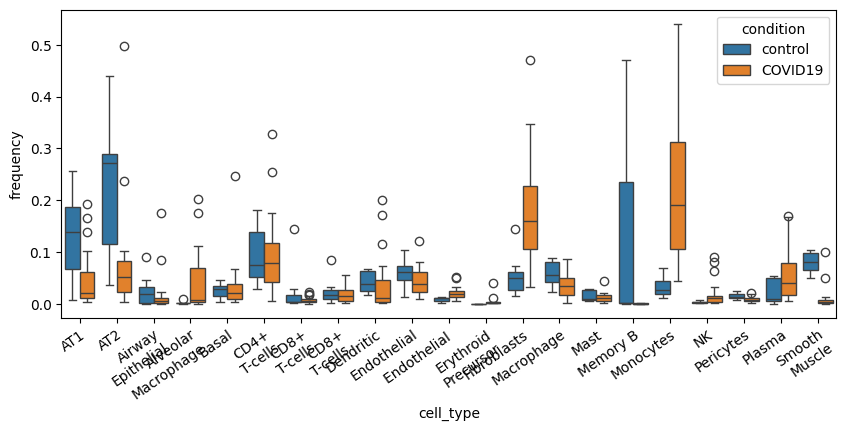

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
ax = sns.boxplot(data=cell_type_counts, x = 'cell_type', y = 'frequency', hue = 'condition')
plt.xticks(rotation=35, rotation_mode='anchor', ha='right')
plt.show()

### Differential Expression

In [13]:
subset = adata[adata.obs['cell_type'].isin(['AT1', 'AT2'])].copy()

2 Ways for Differential Expression: diffxpy or SCVI

#### diffxpy

In [14]:
import diffxpy.api as de

In [15]:
subset.X = subset.X.toarray()

In [16]:
len(subset.var)

21306

In [17]:
sc.pp.filter_genes(subset, min_cells=100)

In [18]:
len(subset.var)

13996

In [19]:
subset.obs

,Sample,doublet,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt,total_counts_ribo,pct_counts_ribo,_scvi_batch,_scvi_labels,leiden,_scvi_raw_norm_scaling,cell_type,condition
CGTTCTGGTACTAGCT-1_1,C51ctr,False,2434,2434,6047.0,0.0,0.0,1.0,0.016537,0,0,4,1.656726,AT2,control
CTGGCAGGTTCGGTAT-1_1,C51ctr,False,2444,2444,5899.0,0.0,0.0,5.0,0.084760,0,0,4,1.699524,AT2,control
ACACCAACACAACGCC-1_1,C51ctr,False,2451,2451,5497.0,0.0,0.0,3.0,0.054575,0,0,3,1.821494,AT1,control
ACAAAGATCCACAGGC-1_1,C51ctr,False,2310,2310,5504.0,0.0,0.0,1.0,0.018169,0,0,4,1.819174,AT2,control
TCACACCCAACTTCTT-1_1,C51ctr,False,2479,2479,5325.0,0.0,0.0,0.0,0.000000,0,0,3,1.881822,AT1,control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CCCTCTCTCCGAACGC-1_27,L22cov,False,362,362,426.0,0.0,0.0,0.0,0.000000,0,0,16,23.474178,AT2,COVID19
TTAATCCGTTGTAAAG-1_27,L22cov,False,371,371,425.0,0.0,0.0,7.0,1.647059,0,0,4,23.640661,AT2,COVID19
GGTAACTTCGGTCACG-1_27,L22cov,False,349,349,415.0,0.0,0.0,4.0,0.963855,0,0,4,24.154589,AT2,COVID19
CCTAAGAAGTTGTCAC-1_27,L22cov,False,344,344,413.0,0.0,0.0,0.0,0.000000,0,0,16,24.213076,AT2,COVID19


In [20]:
res = de.test.wald(
    data=subset,
    formula_loc="~ 1 + condition",
    factor_loc_totest="condition"
)

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\batchglm\models\base_glm\utils.py:110: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  np.mean(x[np.where(grouping == g)[0], :], axis=0)
c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\batchglm\models\base_glm\utils.py:110: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[index

training location model: False
training scale model: True
iter   0: ll=308710742.061706
iter   1: ll=308710742.061706, converged: 0.00% (loc: 100.00%, scale update: False), in 0.00sec
iter   2: ll=88557505.629915, converged: 0.01% (loc: 0.01%, scale update: True), in 564.03sec
iter   3: ll=88557505.629915, converged: 0.01% (loc: 100.00%, scale update: False), in 0.02sec
iter   4: ll=88517282.445297, converged: 99.91% (loc: 99.91%, scale update: True), in 529.84sec
iter   5: ll=88517282.445297, converged: 99.91% (loc: 100.00%, scale update: False), in 0.00sec
iter   6: ll=88516508.322878, converged: 99.98% (loc: 99.98%, scale update: True), in 56.78sec
iter   7: ll=88516508.322878, converged: 99.98% (loc: 100.00%, scale update: False), in 0.00sec
iter   8: ll=88481335.287683, converged: 99.99% (loc: 99.99%, scale update: True), in 0.42sec
iter   9: ll=88481335.287683, converged: 99.99% (loc: 100.00%, scale update: False), in 0.00sec
iter  10: ll=88481160.668161, converged: 99.99% (loc: 

c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\dask\array\core.py:2894: RuntimeWarning: divide by zero encountered in divide
  size = (limit / dtype.itemsize / largest_block) ** (1 / len(autos))


In [21]:
print(subset.shape)

(21007, 13996)


In [23]:
dedf = res.summary().sort_values('log2fc', ascending=False).reset_index(drop=True)
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,LINC02814,0.000000e+00,0.000000e+00,283.913085,0.016309,False,4.940069e-02,283.913085,2.222759e-162,0.000000
1,AL133268.3,0.000000e+00,0.000000e+00,4.476125,0.051467,False,1.853246e-08,4.476125,3.515647e-01,-2596.526795
2,AC078905.1,1.662052e-09,6.290450e-09,4.357224,0.010460,False,4.600852e-09,4.357224,7.228546e-01,-816.137230
3,SEMA3E,0.000000e+00,0.000000e+00,4.320143,0.083629,False,1.301221e-10,4.320143,2.525648e-01,-4357.373137
4,AC245014.3,0.000000e+00,0.000000e+00,3.770449,0.016455,False,5.015594e-10,3.770449,4.403127e-01,-1229.506220
...,...,...,...,...,...,...,...,...,...,...
13991,CLSTN2,0.000000e+00,0.000000e+00,-3.925643,0.017758,False,1.221898e-09,-3.925643,3.396159e-01,-1262.456136
13992,GNB2,0.000000e+00,0.000000e+00,-3.954148,0.014360,False,2.322001e-09,-3.954148,3.843440e-01,-1029.857088
13993,TMSB10,0.000000e+00,0.000000e+00,-4.040523,0.020366,False,3.640816e-11,-4.040523,3.380822e-01,-1314.904821
13994,S100A11,0.000000e+00,0.000000e+00,-4.184089,0.024465,False,5.687121e-09,-4.184089,3.272651e-01,-1539.893661


In [24]:
subset.obs.cell_type.unique()

['AT2', 'AT1']
Categories (2, object): ['AT1', 'AT2']

In [25]:
subset.obs.condition.unique()

array(['control', 'COVID19'], dtype=object)

Find the most upregulated gene expression between the two groups (control vs. covid19)

In [26]:
#finding the most upregulated gene expression between the control and covid patient groups
most_up = dedf.iloc[0].gene
i = np.where(subset.var_names == most_up)[0][0]

ctrl = subset[subset.obs.condition == 'control'].X[:, i]
cov = subset[subset.obs.condition == 'COVID19'].X[:, i]

print(f'{most_up} expression:')
print(f'Control: {ctrl.mean()}')
print(f'COVID19: {cov.mean()}')

LINC02814 expression:
Control: 0.028199588879942894
COVID19: 0.0


Finding the top 25 most upregulated and bottom 25 upregulated genes.

In [27]:
#flip the rows from last to first, first to last
dedf['log2fc'] = dedf['log2fc']*-1
dedf = dedf.sort_values('log2fc', ascending=False).reset_index(drop=True)

In [28]:
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,TUBA1B,0.000000e+00,0.000000e+00,4.469252,0.017048,False,1.900316e-10,-4.469252,4.465047e-01,-1098.669720
1,S100A11,0.000000e+00,0.000000e+00,4.184089,0.024465,False,5.687121e-09,-4.184089,3.272651e-01,-1539.893661
2,TMSB10,0.000000e+00,0.000000e+00,4.040523,0.020366,False,3.640816e-11,-4.040523,3.380822e-01,-1314.904821
3,GNB2,0.000000e+00,0.000000e+00,3.954148,0.014360,False,2.322001e-09,-3.954148,3.843440e-01,-1029.857088
4,CLSTN2,0.000000e+00,0.000000e+00,3.925643,0.017758,False,1.221898e-09,-3.925643,3.396159e-01,-1262.456136
...,...,...,...,...,...,...,...,...,...,...
13991,AC245014.3,0.000000e+00,0.000000e+00,-3.770449,0.016455,False,5.015594e-10,3.770449,4.403127e-01,-1229.506220
13992,SEMA3E,0.000000e+00,0.000000e+00,-4.320143,0.083629,False,1.301221e-10,4.320143,2.525648e-01,-4357.373137
13993,AC078905.1,1.662052e-09,6.290450e-09,-4.357224,0.010460,False,4.600852e-09,4.357224,7.228546e-01,-816.137230
13994,AL133268.3,0.000000e+00,0.000000e+00,-4.476125,0.051467,False,1.853246e-08,4.476125,3.515647e-01,-2596.526795


In [29]:
dedf = dedf[(dedf.qval < 0.05) & (abs(dedf.log2fc)>0.5)]
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,TUBA1B,0.000000e+00,0.000000e+00,4.469252,0.017048,False,1.900316e-10,-4.469252,4.465047e-01,-1098.669720
1,S100A11,0.000000e+00,0.000000e+00,4.184089,0.024465,False,5.687121e-09,-4.184089,3.272651e-01,-1539.893661
2,TMSB10,0.000000e+00,0.000000e+00,4.040523,0.020366,False,3.640816e-11,-4.040523,3.380822e-01,-1314.904821
3,GNB2,0.000000e+00,0.000000e+00,3.954148,0.014360,False,2.322001e-09,-3.954148,3.843440e-01,-1029.857088
4,CLSTN2,0.000000e+00,0.000000e+00,3.925643,0.017758,False,1.221898e-09,-3.925643,3.396159e-01,-1262.456136
...,...,...,...,...,...,...,...,...,...,...
13991,AC245014.3,0.000000e+00,0.000000e+00,-3.770449,0.016455,False,5.015594e-10,3.770449,4.403127e-01,-1229.506220
13992,SEMA3E,0.000000e+00,0.000000e+00,-4.320143,0.083629,False,1.301221e-10,4.320143,2.525648e-01,-4357.373137
13993,AC078905.1,1.662052e-09,6.290450e-09,-4.357224,0.010460,False,4.600852e-09,4.357224,7.228546e-01,-816.137230
13994,AL133268.3,0.000000e+00,0.000000e+00,-4.476125,0.051467,False,1.853246e-08,4.476125,3.515647e-01,-2596.526795


In [30]:
up_down_regulated = dedf[-25:].gene.tolist() + dedf[:25].gene.tolist() #top 25 and bottom 25 from sorted
up_down_regulated

['PSTPIP1',
 'AL049629.1',
 'PRKCG',
 'RGS7',
 'AC087521.3',
 'AC099499.1',
 'MAP3K15',
 'LINC01811',
 'AGBL1-AS1',
 'AC018359.1',
 'AC016987.1',
 'AC135895.1',
 'AC253572.2',
 'AC008674.1',
 'LINC02596',
 'LINC00470',
 'LINC01331',
 'AC097511.1',
 'FOSB',
 'AL136119.1',
 'AC245014.3',
 'SEMA3E',
 'AC078905.1',
 'AL133268.3',
 'LINC02814',
 'TUBA1B',
 'S100A11',
 'TMSB10',
 'GNB2',
 'CLSTN2',
 'HSPA1A',
 'CXorf38',
 'TSPO',
 'AC105402.3',
 'CTSL',
 'RPL27A',
 'RPS28',
 'RPL36',
 'KCTD12',
 'CST3',
 'RPL38',
 'PSAP',
 'HBB',
 'AC104389.5',
 'GLUL',
 'RPS17',
 'EXTL3',
 'DONSON',
 'RPL28',
 'GPX3']

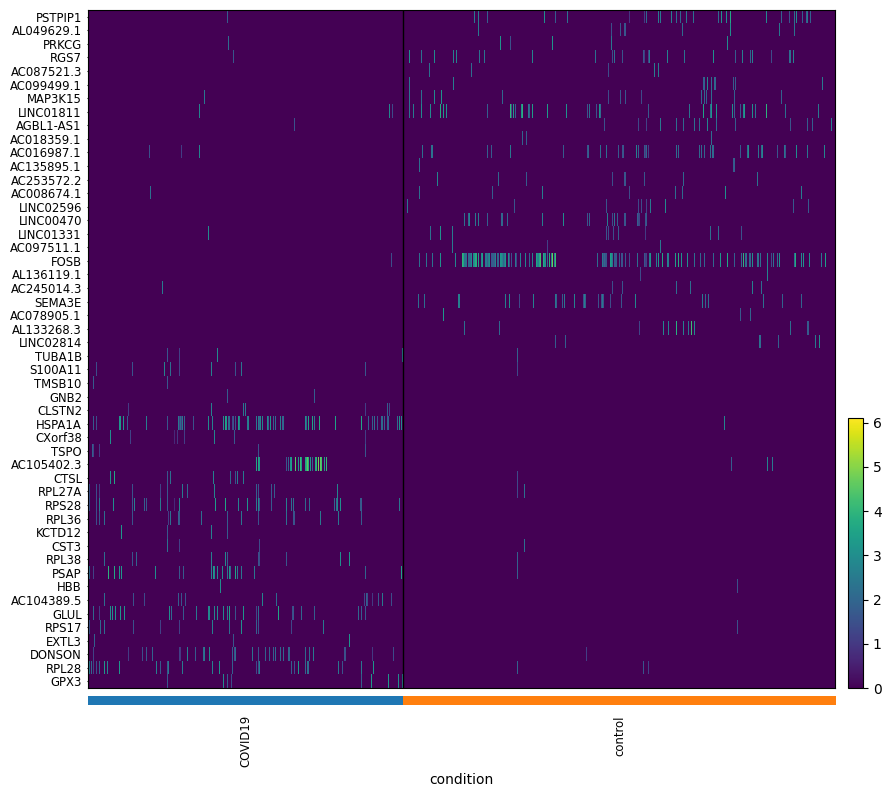

In [31]:
sc.pl.heatmap(subset, up_down_regulated, groupby='condition', swap_axes=True)

Differential Expression with SCVI

In [32]:
model = scvi.model.SCVI.load('model.model', adata)

INFO     File model.model\model.pt already downloaded                                                              


c:\Users\alexg\anaconda3\envs\bioenv\Lib\site-packages\scvi\model\base\_utils.py:66: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_path, map_locatio

In [34]:
scvi_de_at = model.differential_expression(
    idx1 = [adata.obs['cell_type'] == 'AT1'],
    idx2 = [adata.obs['cell_type'] == 'AT2']
)
scvi_de_cond = model.differential_expression(
    idx1 = [(adata.obs['cell_type'].isin(['AT1','AT2'])) & (adata.obs.condition == 'COVID19')],
    idx2 = [(adata.obs['cell_type'].isin(['AT1','AT2'])) & (adata.obs.condition == 'control')]
)

DE...: 100%|██████████| 1/1 [00:13<00:00, 13.95s/it]


In [35]:
scvi_de_at = scvi_de_at[(scvi_de_at['is_de_fdr_0.05']) & (abs(scvi_de_at.lfc_mean) > 0.5)]
scvi_de_at = scvi_de_at.sort_values('lfc_mean')
scvi_de_at

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
CHI3L1,0.9904,0.0096,4.636345,0.000001,0.000031,0.0,0.25,-7.185922,-7.478481,3.509543,-15.929987,4.081987,0.000922,0.053742,0.000922,0.038760,0.003935,0.312415,True
RASGRF1,0.9932,0.0068,4.984008,0.000005,0.000183,0.0,0.25,-6.975427,-7.221453,3.379322,-16.858746,5.609619,0.004084,0.271165,0.003293,0.178444,0.026471,1.666692,True
PTGFR,0.9950,0.0050,5.293303,0.000006,0.000218,0.0,0.25,-6.402069,-6.641221,2.622966,-12.806044,2.930106,0.002503,0.289650,0.002371,0.188879,0.013911,1.788877,True
CXCL17,0.9898,0.0102,4.575114,0.000003,0.000053,0.0,0.25,-6.118568,-6.558390,2.840668,-13.051085,4.812483,0.004347,0.089818,0.003820,0.076625,0.017936,0.560932,True
HLA-DRA,0.9830,0.0170,4.057395,0.000002,0.000025,0.0,0.25,-6.095191,-6.396142,4.413904,-18.912811,9.024954,0.001844,0.023703,0.001186,0.012373,0.011343,0.152675,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AC022325.2,0.9920,0.0080,4.820280,0.000987,0.000016,0.0,0.25,6.471734,6.820916,2.666599,-5.366354,13.470129,1.299279,0.010063,0.447108,0.006783,9.263353,0.068392,True
SCUBE1,0.9920,0.0080,4.820280,0.000041,0.000002,0.0,0.25,6.702633,7.253696,2.999308,-5.146739,13.421414,0.064682,0.000894,0.059676,0.000894,0.443006,0.007633,True
AC245041.2,0.9950,0.0050,5.293303,0.000173,0.000006,0.0,0.25,6.768902,7.089589,2.839829,-5.044111,14.133556,0.304573,0.008348,0.222369,0.007528,1.863002,0.049765,True
AL355499.1,0.9962,0.0038,5.568944,0.000851,0.000016,0.0,0.25,6.809702,7.130810,2.506010,-6.593493,15.333188,1.333253,0.004845,0.536556,0.003354,8.545446,0.018958,True


In [36]:
scvi_de_cond = scvi_de_cond[(scvi_de_cond['is_de_fdr_0.05']) & (abs(scvi_de_cond.lfc_mean) > 0.5)]
scvi_de_cond = scvi_de_cond.sort_values('lfc_mean')
scvi_de_cond

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
IQCN,0.9838,0.0162,4.106411,1.597637e-05,0.000158,0.0,0.25,-3.263886,-3.302812,1.605569,-8.501447,3.243745,0.021224,0.193352,0.015015,0.154745,0.128934,1.463593,True
AC253572.2,0.9680,0.0320,3.409496,1.077801e-06,0.000014,0.0,0.25,-3.037265,-3.001862,1.880824,-9.211034,4.023532,0.000903,0.020331,0.000903,0.018438,0.005738,0.125455,True
AC008674.1,0.9698,0.0302,3.469248,5.368825e-06,0.000042,0.0,0.25,-3.026994,-3.001505,1.946166,-9.637030,4.709570,0.000790,0.015721,0.000790,0.012758,0.003625,0.119281,True
AC245014.3,0.9572,0.0428,3.107474,9.102760e-07,0.000009,0.0,0.25,-2.905562,-2.978199,1.943103,-9.255497,2.968891,0.000339,0.015557,0.000339,0.014651,0.002154,0.096779,True
AP002383.2,0.9744,0.0256,3.639229,4.321644e-06,0.000027,0.0,0.25,-2.851885,-2.811342,1.680788,-9.288167,5.692622,0.004177,0.040003,0.004064,0.035312,0.021999,0.259376,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CXCL12,0.9782,0.0218,3.803804,2.141145e-05,0.000001,0.0,0.25,4.474243,4.357365,3.370605,-10.333845,15.780422,0.018401,0.000905,0.014789,0.000905,0.183006,0.008057,True
C1QB,0.9742,0.0258,3.631242,1.796673e-05,0.000001,0.0,0.25,4.568646,4.434579,4.803424,-14.811785,19.836264,0.013773,0.000494,0.008467,0.000412,0.099841,0.003608,True
IFITM2,0.9834,0.0166,4.081613,2.113295e-05,0.000001,0.0,0.25,4.576498,4.714951,2.720246,-6.565241,12.624899,0.021450,0.001070,0.019982,0.000988,0.149395,0.007919,True
COL1A2,0.9658,0.0342,3.340731,2.799608e-04,0.000021,0.0,0.25,4.580704,4.411869,4.940848,-13.026242,19.398447,0.274891,0.021730,0.090088,0.008643,2.695926,0.154827,True


In [38]:
scvi_de_at = scvi_de_at[(scvi_de_at.raw_normalized_mean1 > 0.5) | (scvi_de_at.raw_normalized_mean2 > 0.5)]
scvi_de_at

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
RASGRF1,0.9932,0.0068,4.984008,0.000005,0.000183,0.0,0.25,-6.975427,-7.221453,3.379322,-16.858746,5.609619,0.004084,0.271165,0.003293,0.178444,0.026471,1.666692,True
PTGFR,0.9950,0.0050,5.293303,0.000006,0.000218,0.0,0.25,-6.402069,-6.641221,2.622966,-12.806044,2.930106,0.002503,0.289650,0.002371,0.188879,0.013911,1.788877,True
CXCL17,0.9898,0.0102,4.575114,0.000003,0.000053,0.0,0.25,-6.118568,-6.558390,2.840668,-13.051085,4.812483,0.004347,0.089818,0.003820,0.076625,0.017936,0.560932,True
SFTPA2,0.9882,0.0118,4.427785,0.000038,0.000721,0.0,0.25,-5.828412,-6.177694,3.356176,-14.705540,7.691705,0.036095,1.606681,0.013042,0.301058,0.187589,8.591737,True
SFTPA1,0.9820,0.0180,3.999219,0.000047,0.000693,0.0,0.25,-5.772409,-6.068131,3.681762,-14.560643,8.687504,0.027401,1.302568,0.011461,0.333930,0.133915,7.323478,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AGER,0.9926,0.0074,4.898846,0.000330,0.000010,0.0,0.25,6.381787,6.584838,2.932422,-4.904116,14.196258,0.528255,0.011926,0.306284,0.009914,3.677894,0.068418,True
AC022325.2,0.9920,0.0080,4.820280,0.000987,0.000016,0.0,0.25,6.471734,6.820916,2.666599,-5.366354,13.470129,1.299279,0.010063,0.447108,0.006783,9.263353,0.068392,True
AC245041.2,0.9950,0.0050,5.293303,0.000173,0.000006,0.0,0.25,6.768902,7.089589,2.839829,-5.044111,14.133556,0.304573,0.008348,0.222369,0.007528,1.863002,0.049765,True
AL355499.1,0.9962,0.0038,5.568944,0.000851,0.000016,0.0,0.25,6.809702,7.130810,2.506010,-6.593493,15.333188,1.333253,0.004845,0.536556,0.003354,8.545446,0.018958,True


In [39]:
scvi_de_cond = scvi_de_cond[(scvi_de_cond.raw_normalized_mean1 > 0.5) | (scvi_de_cond.raw_normalized_mean2 > 0.5)]
scvi_de_cond

,proba_de,proba_not_de,bayes_factor,scale1,scale2,pseudocounts,delta,lfc_mean,lfc_median,lfc_std,lfc_min,lfc_max,raw_mean1,raw_mean2,non_zeros_proportion1,non_zeros_proportion2,raw_normalized_mean1,raw_normalized_mean2,is_de_fdr_0.05
IQCN,0.9838,0.0162,4.106411,0.000016,0.000158,0.0,0.25,-3.263886,-3.302812,1.605569,-8.501447,3.243745,0.021224,0.193352,0.015015,0.154745,0.128934,1.463593,True
AC011444.1,0.9598,0.0402,3.172858,0.000014,0.000103,0.0,0.25,-2.647378,-2.629096,2.259214,-9.157075,5.587667,0.016934,0.141741,0.015579,0.106182,0.099347,0.982511,True
AC096564.1,0.9534,0.0466,3.018434,0.000075,0.000557,0.0,0.25,-2.623233,-2.644551,2.199089,-9.956269,5.142091,0.125987,0.929886,0.095281,0.314594,0.700436,5.177653,True
AC022217.3,0.9562,0.0438,3.083333,0.000025,0.000108,0.0,0.25,-2.510727,-2.560224,1.967655,-8.165395,6.096786,0.035561,0.161003,0.029126,0.127747,0.192161,1.105674,True
FOSB,0.9434,0.0566,2.813481,0.000050,0.000429,0.0,0.25,-2.506880,-2.406727,2.123774,-9.505556,3.526319,0.016369,0.604752,0.011628,0.270310,0.113182,4.508393,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PSAP,0.9676,0.0324,3.396660,0.000193,0.000015,0.0,0.25,3.694735,3.623764,3.099034,-7.144774,13.681938,0.182094,0.006338,0.086363,0.003292,1.658075,0.031141,True
COL3A1,0.9708,0.0292,3.503951,0.000320,0.000016,0.0,0.25,4.149176,3.898283,4.011196,-11.139128,15.941588,0.350078,0.016462,0.096410,0.006009,3.564183,0.115596,True
HSPA1B,0.9836,0.0164,4.093937,0.000121,0.000005,0.0,0.25,4.277160,4.223576,2.359797,-3.151050,11.356307,0.147324,0.005433,0.103861,0.004527,1.173240,0.035598,True
HSPA1A,0.9944,0.0056,5.179371,0.000281,0.000014,0.0,0.25,4.310390,4.301321,1.730945,-2.077271,9.914173,0.369381,0.007326,0.191917,0.004362,2.626546,0.042467,True


In [40]:
up_down_regulated1 = scvi_de_at[-25:].index.tolist() + scvi_de_at[:25].index.tolist()
up_down_regulated2 = scvi_de_cond[-25:].index.tolist() + scvi_de_cond[:25].index.tolist()

The following heatmap is a differential gene expression analysis between AT1 and AT2 cell types

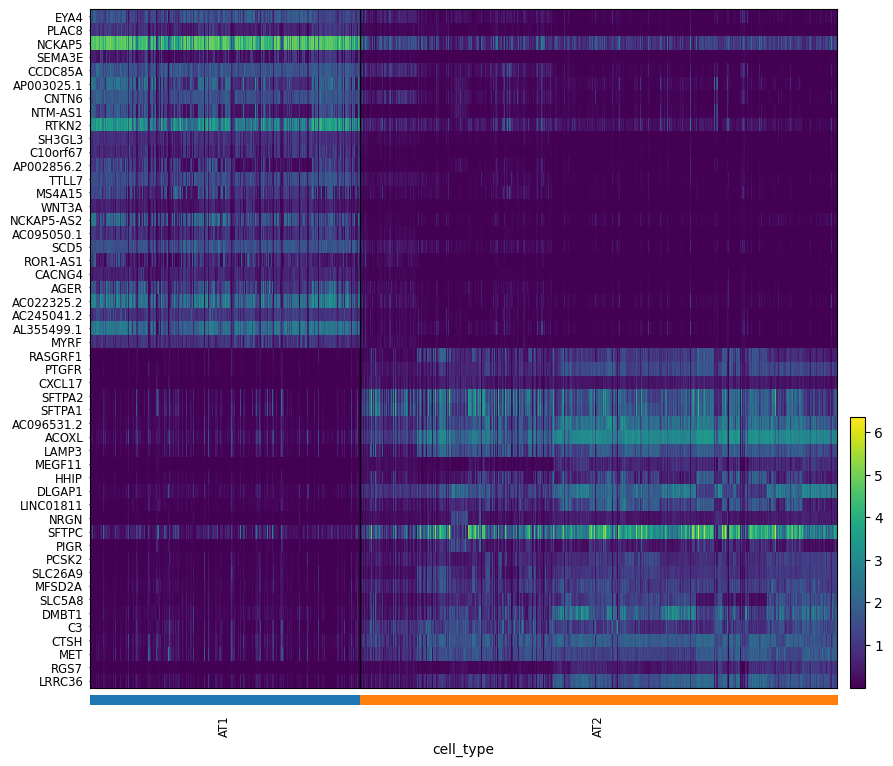

In [41]:
sc.pl.heatmap(subset, up_down_regulated1, groupby='cell_type', swap_axes=True, layer='scvi_normalized', log=True)

The following heatmap is a differential gene expression on AT1 and AT2 cell types in COVID19 and control samples.

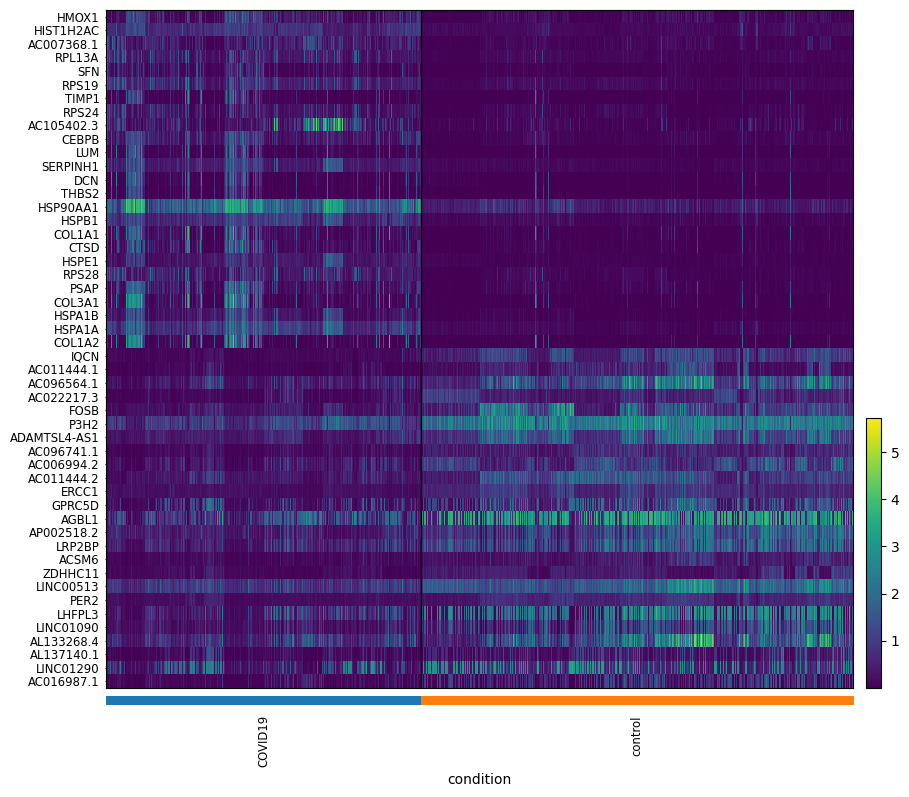

In [43]:
sc.pl.heatmap(subset, up_down_regulated2, groupby='condition', swap_axes=True, layer='scvi_normalized', log=True)

## Gene Ontology Enrichment

In [46]:
import gseapy as gp

In [47]:
gp.get_library_name()

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_2023',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_2024',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'ChEA_2022',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DGIdb_Drug_Targets_2024',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_CRISPR_GeneDependency_CellLines_2023',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_Cell

In [48]:
subset

AnnData object with n_obs × n_vars = 21007 × 13996
    obs: 'Sample', 'doublet', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'pct_counts_ribo', '_scvi_batch', '_scvi_labels', 'leiden', '_scvi_raw_norm_scaling', 'cell_type', 'condition'
    var: 'n_cells'
    uns: 'Sample_colors', '_scvi_manager_uuid', '_scvi_uuid', 'leiden', 'leiden_colors', 'log1p', 'markers', 'neighbors', 'rank_genes_groups', 'scvi_markers', 'umap', 'condition_colors', 'cell_type_colors'
    obsm: 'X_scVI', 'X_umap', '_scvi_extra_categorical_covs', '_scvi_extra_continuous_covs'
    layers: 'counts', 'scvi_normalized'
    obsp: 'connectivities', 'distances'

In [49]:
dedf

,gene,pval,qval,log2fc,mean,zero_mean,grad,coef_mle,coef_sd,ll
0,TUBA1B,0.000000e+00,0.000000e+00,4.469252,0.017048,False,1.900316e-10,-4.469252,4.465047e-01,-1098.669720
1,S100A11,0.000000e+00,0.000000e+00,4.184089,0.024465,False,5.687121e-09,-4.184089,3.272651e-01,-1539.893661
2,TMSB10,0.000000e+00,0.000000e+00,4.040523,0.020366,False,3.640816e-11,-4.040523,3.380822e-01,-1314.904821
3,GNB2,0.000000e+00,0.000000e+00,3.954148,0.014360,False,2.322001e-09,-3.954148,3.843440e-01,-1029.857088
4,CLSTN2,0.000000e+00,0.000000e+00,3.925643,0.017758,False,1.221898e-09,-3.925643,3.396159e-01,-1262.456136
...,...,...,...,...,...,...,...,...,...,...
13991,AC245014.3,0.000000e+00,0.000000e+00,-3.770449,0.016455,False,5.015594e-10,3.770449,4.403127e-01,-1229.506220
13992,SEMA3E,0.000000e+00,0.000000e+00,-4.320143,0.083629,False,1.301221e-10,4.320143,2.525648e-01,-4357.373137
13993,AC078905.1,1.662052e-09,6.290450e-09,-4.357224,0.010460,False,4.600852e-09,4.357224,7.228546e-01,-816.137230
13994,AL133268.3,0.000000e+00,0.000000e+00,-4.476125,0.051467,False,1.853246e-08,4.476125,3.515647e-01,-2596.526795


In [50]:
dedf[dedf.log2fc > 0].gene.tolist()

['TUBA1B',
 'S100A11',
 'TMSB10',
 'GNB2',
 'CLSTN2',
 'HSPA1A',
 'CXorf38',
 'TSPO',
 'AC105402.3',
 'CTSL',
 'RPL27A',
 'RPS28',
 'RPL36',
 'KCTD12',
 'CST3',
 'RPL38',
 'PSAP',
 'HBB',
 'AC104389.5',
 'GLUL',
 'RPS17',
 'EXTL3',
 'DONSON',
 'RPL28',
 'GPX3',
 'UBB',
 'CTSD',
 'RPS19',
 'MAF1',
 'HSPE1',
 'VAT1',
 'PLA2G7',
 'CEBPB',
 'DYNLL2',
 'BSG',
 'OAZ1',
 'IRF2BPL',
 'IFI6',
 'HSPA1B',
 'CSTB',
 'UBA52',
 'LUM',
 'ATP5F1E',
 'DDIT4',
 'TNFSF13',
 'GPNMB',
 'PFN1',
 'GRN',
 'RPL13A',
 'RPL13',
 'FTL',
 'HLA-C',
 'RPS5',
 'RPL37A',
 'ARL6IP1',
 'SERF2',
 'RPL35',
 'CD163',
 'DCN',
 'B2M',
 'GAPDH',
 'DNAJA4',
 'CTSZ',
 'COL3A1',
 'CTSC',
 'NRK',
 'HLA-B',
 'IFITM2',
 'NACA',
 'PRDX3',
 'BST2',
 'CXCL12',
 'ATP6V0C',
 'HS3ST2',
 'GABARAP',
 'RPL18',
 'RPL39',
 'RPS27',
 'H3F3A',
 'RPL26',
 'CFL1',
 'ATP6AP2',
 'UBE2L6',
 'PPDPF',
 'RPL27',
 'HSP90AA1',
 'RPS27A',
 'APOE',
 'MAF',
 'BPNT1',
 'RNF165',
 'DISC1FP1',
 'RPS11',
 'TOP2A',
 'OAS1',
 'EFHD2',
 'MS4A6A',
 'GAS2L3',
 'CXCL

In [53]:
#look at the dedf dataframe and compare to the 'KEGG 2021 Human', and 'Go biological process 2021' Ontology library
enr = gp.enrichr(gene_list=dedf[dedf.log2fc>0].gene.tolist(),
                 gene_sets=['KEGG_2021_Human', 'GO_Biological_Process_2021'],
                 organism='human',
                 outdir=None, #dont write to disk
                 background = subset.var_names.tolist()
                 )

In [54]:
enr.results

,Gene_set,Term,P-value,Adjusted P-value,Old P-value,Old adjusted P-value,Odds Ratio,Combined Score,Genes
0,KEGG_2021_Human,Ribosome,2.008560e-38,6.306880e-36,0,0,12.947499,1123.853486,RPL4;RPL5;RPL30;MRPS15;RPL3;MRPS16;RPL32;RPL31...
1,KEGG_2021_Human,Coronavirus disease,1.070320e-29,1.680402e-27,0,0,6.045153,403.254091,RPL4;RPL5;RPL30;RPL3;RPL32;RPL31;RPL34;F13A1;R...
2,KEGG_2021_Human,Antigen processing and presentation,1.203805e-18,1.259983e-16,0,0,16.951527,699.437686,CIITA;HSP90AB1;CTSS;HLA-DMA;HLA-DMB;CTSL;HLA-D...
3,KEGG_2021_Human,Phagosome,1.369274e-16,1.074880e-14,0,0,4.996255,182.498617,SCARB1;ITGAM;TFRC;ITGB5;NCF2;TCIRG1;ACTB;CTSS;...
4,KEGG_2021_Human,Allograft rejection,3.602247e-10,1.885176e-08,0,0,30.319787,659.282347,CD86;CD40;HLA-B;HLA-C;HLA-A;HLA-F;HLA-G;HLA-E;...
...,...,...,...,...,...,...,...,...,...
5621,GO_Biological_Process_2021,RNA metabolic process (GO:0016070),9.997426e-01,9.999831e-01,0,0,0.399838,0.000103,PTBP1;RNASEL;PAPOLG;PCBP1;RNASET2;HNRNPH2;HNRN...
5622,GO_Biological_Process_2021,mRNA transport (GO:0051028),9.997884e-01,9.999831e-01,0,0,0.352963,0.000075,NDC1;SLBP;RBM15B;RBM8A;EIF4A3;NUP62;THOC3;SLU7...
5623,GO_Biological_Process_2021,regulation of mRNA processing (GO:0050684),9.998597e-01,9.999831e-01,0,0,0.101255,0.000014,JMJD6
5624,GO_Biological_Process_2021,snRNA transcription by RNA polymerase II (GO:0...,9.999796e-01,9.999831e-01,0,0,0.169597,0.000003,GTF2A2;SP1;POLR2L


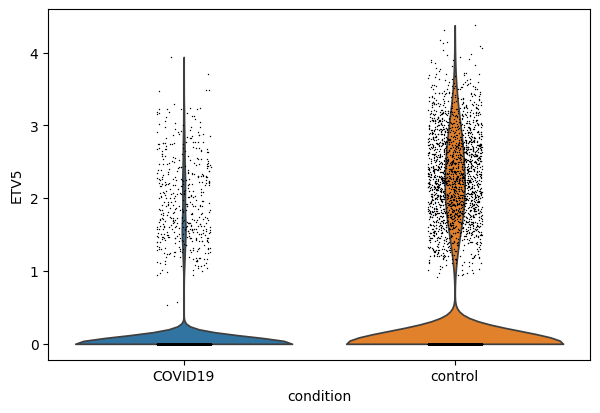

In [55]:
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition')

In [56]:
from scipy import stats

In [57]:
temp = subset[subset.obs.cell_type == 'AT2']

i = np.where(temp.var_names == 'ETV5')[0][0]

In [58]:
a = temp[temp.obs.condition == 'COVID19'].X[:,i]
b = temp[temp.obs.condition == 'control'].X[:,i]

In [70]:
stats.mannwhitneyu(a,b)

MannwhitneyuResult(statistic=18004821.5, pvalue=2.317577905043303e-160)

In [71]:
# Assuming 'a' and 'b' are your datasets
result = stats.mannwhitneyu(a, b)

# Extract the p-value and format it
formatted_pvalue = f"pvalue={result.pvalue:.1e}"

# Print the formatted p-value
print(formatted_pvalue)


pvalue=2.3e-160


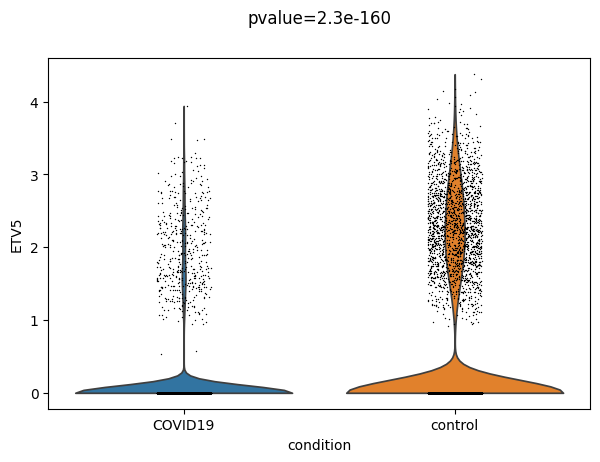

In [72]:
import scanpy as sc
import matplotlib.pyplot as plt

# Generate the violin plot
sc.pl.violin(subset[subset.obs.cell_type == 'AT2'], 'ETV5', groupby='condition', show=False)

# Adjust layout to make space for text outside the chart
plt.subplots_adjust(top=0.85)

# Add text above the chart (outside)
plt.text(x=0.5, y=1.1, s=f"{formatted_pvalue}", fontsize=12, color='black', ha='center', transform=plt.gca().transAxes)

# Show the updated plot
plt.show()
